In [2]:
import pandas as pd
import numpy as np

# Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Dataset.csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [5]:
# Creating a regression model to predict the aggregate rating of a restaurant based on available features
# Import necessary libraries for data splitting, regression, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Has Table booking', 'Has Online delivery'], drop_first=True)

In [7]:
# Select features and target variable
features = ['Average Cost for two', 'Votes', 'Price range', 'Has Table booking_Yes', 'Has Online delivery_Yes']
target = 'Aggregate rating'

X = df[features]
y = df[target]

In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Experimenting with different algorithms (e.g., linear regression, decision trees, random forest)
# And compare their performance by evaluating the model's performance using appropriate metrics

# Define a dictionary of regression models to experiment with
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Iterate through each model, train, evaluate, and print results
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) to evaluate model accuracy
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R2) to assess the goodness of fit
    r2 = r2_score(y_test, y_pred)

    # Print model performance metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("---------------------------")


Model: Linear Regression
Mean Squared Error: 1.6764802747031446
R-squared: 0.26344464090219477
---------------------------
Model: Decision Tree
Mean Squared Error: 0.20316843616593594
R-squared: 0.9107387049429865
---------------------------
Model: Random Forest
Mean Squared Error: 0.13482900100287362
R-squared: 0.9407633810257299
---------------------------


In [12]:
# Iterate through each model, train, evaluate, and interpret results
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE) to evaluate model accuracy
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R2) to assess the goodness of fit
    r2 = r2_score(y_test, y_pred)

    # Print model performance metrics
    print(f"Model: {model_name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Interpret the model results
    if isinstance(model, LinearRegression):
        # For linear regression, print the coefficients
        coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
        print("Coefficients:")
        print(coefficients)
    elif isinstance(model, DecisionTreeRegressor) or isinstance(model, RandomForestRegressor):
        # For tree-based models, print feature importances
        importances = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
        importances = importances.sort_values(by='Importance', ascending=False)
        print("Feature Importances:")
        print(importances)

    print("---------------------------")


Model: Linear Regression
Mean Squared Error: 1.6764802747031446
R-squared: 0.26344464090219477
Coefficients:
                   Feature  Coefficient
0     Average Cost for two     0.000001
1                    Votes     0.000673
2              Price range     0.654436
3    Has Table booking_Yes    -0.240526
4  Has Online delivery_Yes     0.651948
---------------------------
Model: Decision Tree
Mean Squared Error: 0.20223218987254676
R-squared: 0.9111500412618426
Feature Importances:
                   Feature  Importance
1                    Votes    0.973786
0     Average Cost for two    0.016988
2              Price range    0.004928
4  Has Online delivery_Yes    0.002984
3    Has Table booking_Yes    0.001314
---------------------------
Model: Random Forest
Mean Squared Error: 0.13366397615609935
R-squared: 0.9412752303491737
Feature Importances:
                   Feature  Importance
1                    Votes    0.971755
0     Average Cost for two    0.018150
2              Price

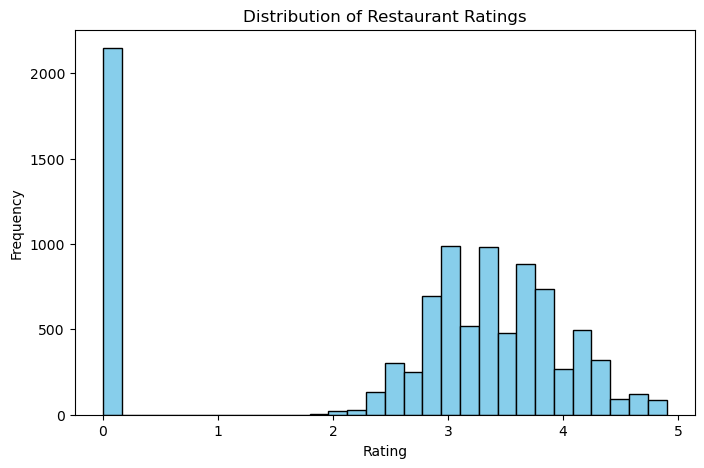

In [10]:
# Distribution of ratings by using a histogram
plt.figure(figsize=(8, 5))
plt.hist(df['Aggregate rating'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Restaurant Ratings')

# Display Chart
plt.show()

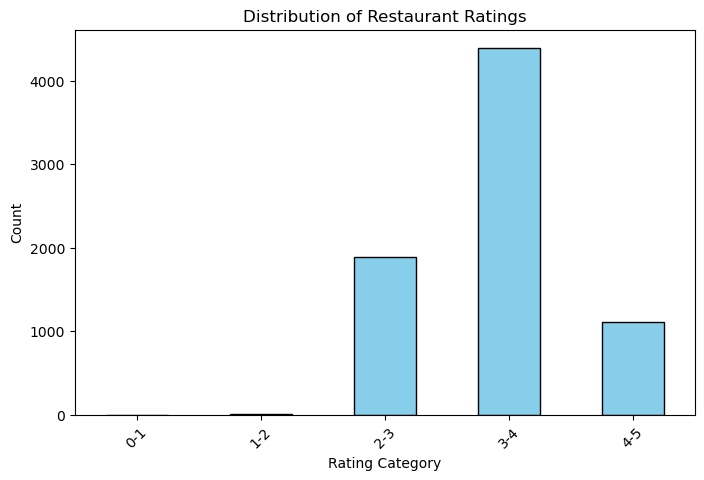

In [11]:
# Distribution of ratings by using a bar plot
# Group ratings into categories (e.g., 0-1, 1-2, 2-3, etc.)
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']
df['Rating Category'] = pd.cut(df['Aggregate rating'], bins=bins, labels=labels)

# Count the number of restaurants in each rating category
rating_counts = df['Rating Category'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.title('Distribution of Restaurant Ratings')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display Chart
plt.show()